In [1]:
## 引入包
import qutip
from qutip import *
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import matplotlib.ticker as ticker
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

import arc #Import ARC (Alkali Rydberg Calculator)
from arc import *
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.6.2
Numpy Version:      1.21.4
Scipy Version:      1.7.3
Cython Version:     0.29.25
Matplotlib Version: 3.1.0
Python Version:     3.7.3
Number of CPUs:     6
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Windows (AMD64)
Installation path:  D:\Download\programme\Anaconda\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.ci

## Use a simple 2 piecewise function to substitude the power spectrum Fig 7a

### Convert to $\phi(t)$ using the reference [49] page. 65

In [3]:
dash_if=1 # If using dash blue, then times 10 to Sphi_950
def Sphi_950(f):
    if (0.029<f and f<1):
        return 9840.57310*f**1.9653701/(f*1e6)**2/10*dash_if#/(1+16*f**2)
    elif (f>=1 and f<=4):
        return 6276.48639*f**-2.302867/(f*1e6)**2/10*dash_if#/(1+16*f**2)
    else:
        return 0
def Sphi_795(f):
    if (0.029<f and f<1):
        return 1818.4381825*f**1.8271824 /(f*1e6)**2#/(1+16*f**2)
    elif (f>=1 and f<=4):
        return 1336.156642*(f**(-1.0978287))/(f*1e6)**2#/(1+16*f**2)
    else:
        return 0
    
step=100;
total=int(4000000/step);

def phi_795(t,randphi_f):
    phi=0
    for i in range(total):   # from 0 to 4MHz, step = 100 Hz
        phi=phi+np.sqrt(2)*np.sqrt(Sphi_795(i*step/10e6))*np.sqrt(step)*np.cos(2*np.pi*(i*step)*t+randphi_f[i])
    return phi

def phi_950(t,randphi_f):
    phi=0
    for i in range(total):   # from 0 to 4MHz, step = 100 Hz
        phi=phi+np.sqrt(2)*np.sqrt(Sphi_950(i*step/10e6))*np.sqrt(step)*np.cos(2*np.pi*(i*step)*t+randphi_f[i])
    return phi


D:\Download\programme\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
D:\Download\programme\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


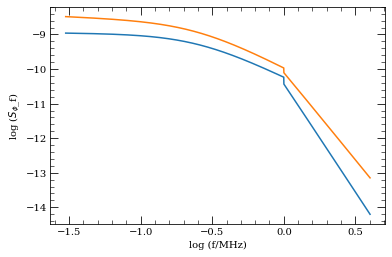

In [11]:
f = np.linspace(20000,4000000,int((4000000-20000)/1000)+1,endpoint=True)
S1=[]
S2=[]
for a in np.linspace(20000,4000000,int((4000000-20000)/1000)+1,endpoint=True):
    S1=np.append(Sphi_950(a/1e6),S1)
    S2=np.append(Sphi_795(a/1e6),S2)
fig, ax = plt.subplots()
S1=S1[::-1]
S2=S2[::-1]
ax.plot(np.log10(f)-6,np.log10(S1))
ax.plot(np.log10(f)-6,np.log10(S2))
ax.set_xlabel('log (f/MHz)') 
ax.set_ylabel('log ($S_\phi$_f)') 
plt.show()

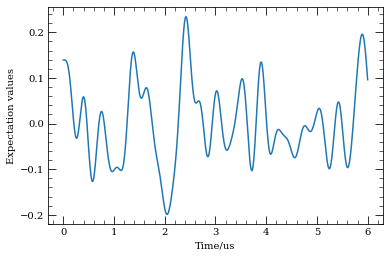

In [104]:
randphi_f_795t=np.random.normal(0,2*np.pi,total)
randphi_f_950t=np.random.normal(0,2*np.pi,total)
times = np.linspace(0,6e-6,600,endpoint=True)

fig, ax = plt.subplots()

ax.plot(times*1e6,phi_795(times,randphi_f_795t))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Time/us') 
ax.set_ylabel('Expectation values') 
plt.show()

In [109]:
g=basis(4,0)
inte=basis(4,1)
r=basis(4,2)
rp=basis(4,3)
psi0=g
rho_00=g*g.dag()
rho_rr=r*r.dag()
rho_ee=inte*inte.dag()
rho_rpr=rp*r.dag()
rho_gr=g*r.dag()
Decay_i=g*inte.dag()
Decay_r=rp*r.dag()

Gamma_420=1/(115e-9)
gamma_r=1/(80e-6)
gamma_rp=1/(230e-6)

Delta=450e6
Omega_ge=30e6
Omega_er=30e6 
H0=2*np.pi*(Delta*inte*inte.dag()+(Omega_er**2-Omega_ge**2)/4/Delta*r*r.dag())
Hge=2*np.pi*Omega_ge/2.0*(g*inte.dag())
Heg=2*np.pi*Omega_ge/2.0*(inte*g.dag())
Hir=2*np.pi*Omega_er/2.0*(inte*r.dag())
Hri=2*np.pi*Omega_er/2.0*(r*inte.dag())
print(H0/2/np.pi)
timepiece=600
t = np.linspace(0,6e-6,timepiece,endpoint=True)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 4.5e+08 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00]]


In [110]:
x=np.zeros(timepiece)
realizations=100
for i in range(realizations):
    randphi_f_795=np.random.normal(0,2*np.pi,40000)# from 0 to 4MHz, step = 100 Hz
    randphi_f_950=np.random.normal(0,2*np.pi,40000)
    expphi_795=np.exp(complex(0,1)*phi_795(t,randphi_f_795))
    expphi_475=np.exp(2*complex(0,1)*phi_950(t,randphi_f_950))
    Sge = Cubic_Spline(t[0], t[-1], expphi_795)
    Seg = Cubic_Spline(t[0], t[-1], np.conj(expphi_795))
    Sir = Cubic_Spline(t[0], t[-1], expphi_475)
    Sri = Cubic_Spline(t[0], t[-1], np.conj(expphi_475))

    H = [H0,[Hge,Sge],[Heg,Seg],[Hir,Sir],[Hri,Sri]]
    #H = H0+H2+H1
    result = mesolve(H,psi0,t,[],[rho_rr])
    #result = mesolve(H,psi0,t,[np.sqrt(Gamma_420/2)*Decay_i,np.sqrt(gamma_rp)*Decay_r],[rho_rr])
    x=np.vstack((result.expect,x))


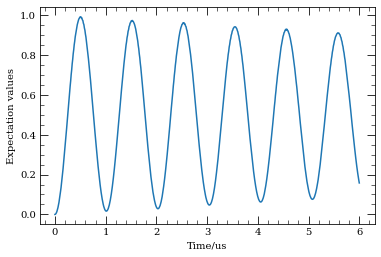

[0.         0.00099789 0.00389125 0.00891221 0.01549885 0.02458267
 0.03462469 0.04770407 0.06095086 0.07784696 0.09405954 0.11448183
 0.13344684 0.15699342 0.17852236 0.20468257 0.22859741 0.25676533
 0.28287676 0.31238271 0.34046819 0.3706281  0.40041456 0.43058524
 0.46173783 0.49136092 0.52347521 0.5520998  0.58469527 0.61197713
 0.64449479 0.67017978 0.70198801 0.7258892  0.75630042 0.7782774
 0.80657573 0.82651976 0.85199628 0.86981987 0.89181374 0.9074421
 0.92538204 0.93874208 0.95218473 0.96319019 0.97184952 0.98038301
 0.98414716 0.99004623 0.98898008 0.99203383 0.98636713 0.98632749
 0.97642929 0.97303813 0.95937863 0.95240401 0.93550863 0.92478237
 0.90518604 0.89063459 0.86884479 0.85051222 0.82698712 0.8050514
 0.78019439 0.75497654 0.72914124 0.70110279 0.67459773 0.64432064
 0.61740777 0.58555716 0.55844897 0.52572818 0.49859481 0.46570718
 0.43870233 0.40632778 0.37962887 0.34841167 0.32225879 0.2927951
 0.26751195 0.24032886 0.21631689 0.19184652 0.16955764 0.14811849

In [111]:
average=np.sum(x,axis=0)/realizations
fig, ax = plt.subplots()

ax.plot(t*1e6, average)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Time/us') 
ax.set_ylabel('Expectation values') 
plt.show()
print(average)

In [32]:

def Snu_795(f):
    if (0.029<f and f<1):
        return 1500*f**1.7723
    elif (f>=1 and f<=4):
        return 1500.156642*f**-1.0978287
    else:
        return 0

In [37]:
Snu_795(4)

327.47478945616797